In [2]:
import utils 

import numpy as np
import scipy as sp 
from matplotlib import pyplot as plt
import sklearn 

import pandas as pd

In [92]:
basic_data_list= [('price','Close'),
                         ('esg','Anti-Competitive Practices'),
                         ('esg','Environmental Reporting'),
                         ('esg','Freedom of Association'),
                         ('esg','Board Diversity Policy'),
                         ('esg','Human Rights Commitment')]

In [103]:
possible_list =utils.get_esg_list()

In [109]:
possible_list[50]

'Indirect Greenhouse Gas Emissions (Scope 3)'

In [94]:
def get_regression_data(ticker,data_list):
    time_delta = 90 
    company = utils.company(ticker,autofill=True,esg_constrain=True)
    company.update_time_range('2010-01-01','2023-12-08',time_delta)
    
    company_data= company.read_data(data_list)
    
    SPY_data = company.read_spy_data()
    
    company_y = company_data[1][0,:]
    normized_y = (company_y/SPY_data) * (SPY_data[0]/ company_y[0])
    
    company_x = company_data[1][1:,:] - company_data[1][1:,0].reshape(-1,1)
    
    return (company_x, normized_y)

In [110]:
full_data_list = [('price','Close')]
for i in utils.get_esg_list()[0:60] : 
    full_data_list.append(('esg',i))

In [111]:
n = 100 
data_list = full_data_list 
company_list = utils.get_company_list(n)
(data_x,data_y) = get_regression_data(company_list[0],data_list)

for i in range(1, 100): 
    (company_x , company_y ) = get_regression_data(company_list[i],data_list)
    data_x = np.hstack((data_x,company_x))
    data_y = np.hstack((data_y,company_y))
    
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(
    data_x.T, data_y, test_size=0.33, random_state=42)

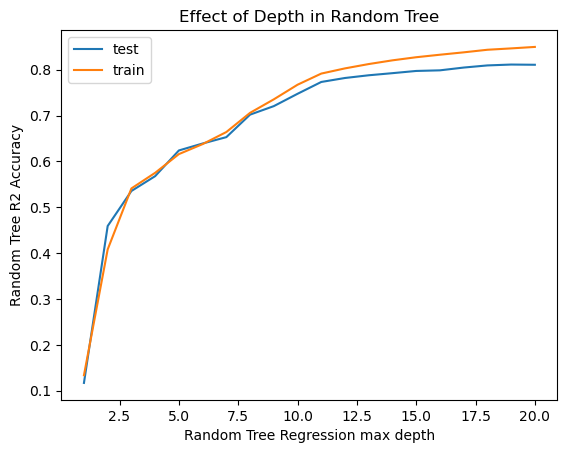

In [119]:
# Random Tree Depth Number
Dnum = 20 
RT_esti_train = np.zeros(Dnum)
RT_esti_test  = np.zeros(Dnum)

for i in range(Dnum): 
    clf = tree.DecisionTreeRegressor(max_depth=i+1,random_state=50,min_samples_leaf=5)
    clf = clf.fit(x_train, y_train)
    
    RT_esti_train[i] = clf.score(x_train,y_train)
    RT_esti_test[i]  = clf.score(x_test, y_test)

RT_x = 1 + np.arange(Dnum)
plt.plot(RT_x, RT_esti_test,label='test')
plt.plot(RT_x, RT_esti_train, label='train')
plt.xlabel('Random Tree Regression max depth')
plt.ylabel('Random Tree R2 Accuracy')
plt.title('Effect of Depth in Random Tree')
plt.savefig('RT_Depth.png')
plt.show()

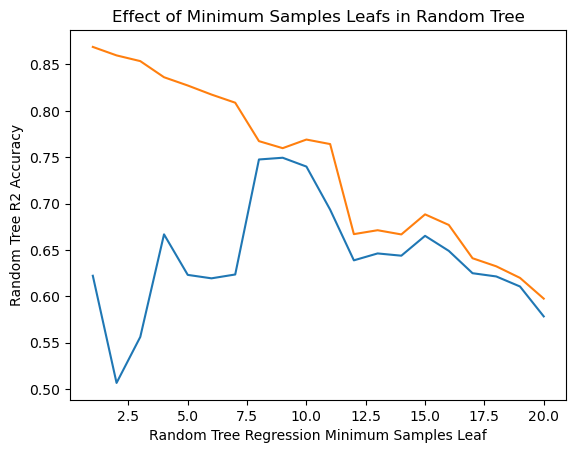

In [125]:
# Random Tree Depth Number
Lnum = 20 
RT_esti_train = np.zeros(Lnum)
RT_esti_test  = np.zeros(Lnum)

for i in range(Dnum): 
    clf = tree.DecisionTreeRegressor(max_depth=10,random_state=50,min_samples_leaf=i+1)
    clf = clf.fit(x_train, y_train)
    
    RT_esti_train[i] = clf.score(x_train,y_train)
    RT_esti_test[i]  = clf.score(x_test, y_test)

RT_x = 1 + np.arange(Lnum)
plt.plot(RT_x, RT_esti_test,label='test')
plt.plot(RT_x, RT_esti_train, label='train')
plt.xlabel('Random Tree Regression Minimum Samples Leaf')
plt.ylabel('Random Tree R2 Accuracy')
plt.title('Effect of Minimum Samples Leafs in Random Tree')
plt.savefig('RT_MSL.png')
plt.show()

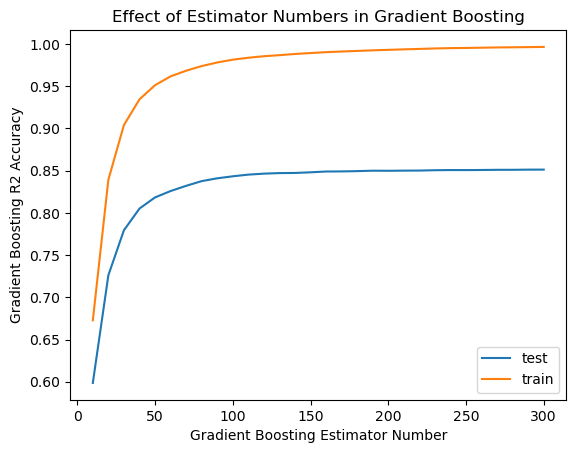

In [120]:
from sklearn.ensemble import GradientBoostingRegressor
# Gradient Boosting Regressor n_estimators 
Gnum = 30
GBR_esti_train = np.zeros(Gnum)
GBR_esti_test  = np.zeros(Gnum)

for i in range(Gnum):
    est = GradientBoostingRegressor(n_estimators=10+10*i, learning_rate=0.1, max_depth=5, random_state=1,
                                    loss='squared_error').fit(x_train,y_train)
    GBR_esti_train[i] = est.score(x_train,y_train)
    GBR_esti_test[i]  = est.score(x_test,y_test)
    
GBR_x = 10+ 10*np.arange(Gnum)
plt.plot(GBR_x, GBR_esti_test, label='test')
plt.plot(GBR_x, GBR_esti_train, label='train')
plt.xlabel("Gradient Boosting Estimator Number")
plt.ylabel("Gradient Boosting R2 Accuracy")
plt.title("Effect of Estimator Numbers in Gradient Boosting")
plt.legend()
plt.savefig("GBR_Estimator.png")
plt.show()

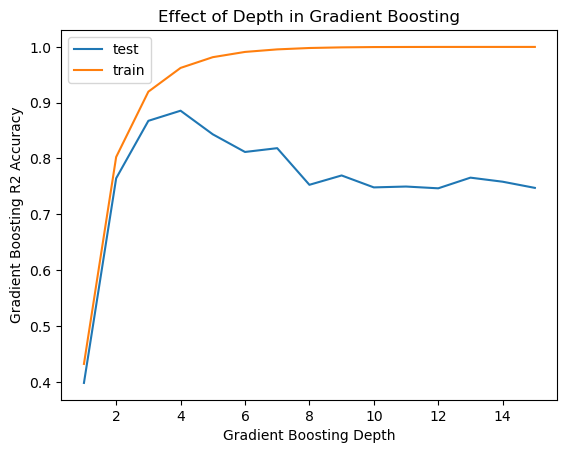

In [121]:
from sklearn.ensemble import GradientBoostingRegressor
# Gradient Boosting Regressor Depth
Dnum = 15
GBR_esti_train = np.zeros(Dnum)
GBR_esti_test  = np.zeros(Dnum)

for i in range(Dnum):
    est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1+i, random_state=1,
                                    loss='squared_error').fit(x_train,y_train)
    GBR_esti_train[i] = est.score(x_train,y_train)
    GBR_esti_test[i]  = est.score(x_test,y_test)
    
GBR_x = 1 + np.arange(Dnum)
plt.plot(GBR_x, GBR_esti_test, label='test')
plt.plot(GBR_x, GBR_esti_train, label='train')
plt.xlabel("Gradient Boosting Depth")
plt.ylabel("Gradient Boosting R2 Accuracy")
plt.title("Effect of Depth in Gradient Boosting")
plt.legend()
plt.savefig("GBR_Depth.png")
plt.show()

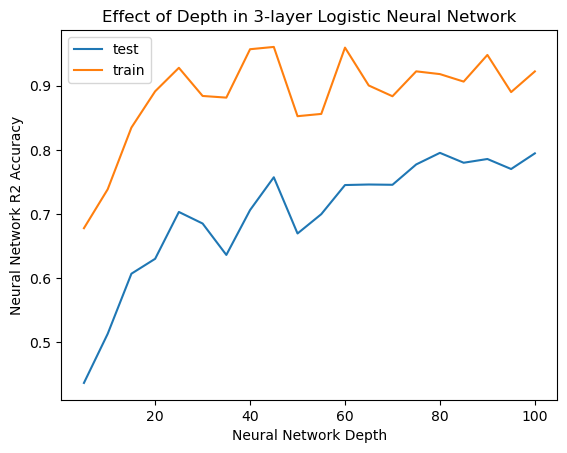

In [135]:
# Neural Network Regressor Depth (logistic)
from sklearn.neural_network import MLPRegressor
Dnum = 20
NN_esti_train = np.zeros(Dnum)
NN_esti_test  = np.zeros(Dnum)

for i in range(Dnum):
    est = MLPRegressor(hidden_layer_sizes=(5+5*i,2), alpha=0.01,max_iter=2000,random_state=43,activation='logistic').fit(x_train,y_train)
    NN_esti_train[i] = est.score(x_train,y_train)
    NN_esti_test[i]  = est.score(x_test,y_test)
    
NN_x = 5 +  5* np.arange(Dnum)
plt.plot(NN_x, NN_esti_test, label='test')
plt.plot(NN_x, NN_esti_train, label='train')
plt.xlabel("Neural Network Depth")
plt.ylabel("Neural Network R2 Accuracy")
plt.title("Effect of Depth in 3-layer Logistic Neural Network")
plt.legend()
plt.savefig("Three_Layer_NN_Depth_Logistic.png")
plt.show()




# Three layer Neural Network Regressor Depth (logistic)
from sklearn.neural_network import MLPRegressor
Dnum = 20
NN_esti_train = np.zeros(Dnum)
NN_esti_test  = np.zeros(Dnum)

for i in range(Dnum):
    est = MLPRegressor(hidden_layer_sizes=5+5*i, alpha=0.01,max_iter=2000,random_state=43,activation='logistic').fit(x_train,y_train)
    NN_esti_train[i] = est.score(x_train,y_train)
    NN_esti_test[i]  = est.score(x_test,y_test)
    
NN_x = 5 +  5* np.arange(Dnum)
plt.plot(NN_x, NN_esti_test, label='test')
plt.plot(NN_x, NN_esti_train, label='train')
plt.xlabel("Neural Network Depth")
plt.ylabel("Neural Network R2 Accuracy")
plt.title("Effect of Depth in Logistic Neural Network")
plt.legend()
plt.savefig("NN_Depth_Logistic.png")
plt.show()


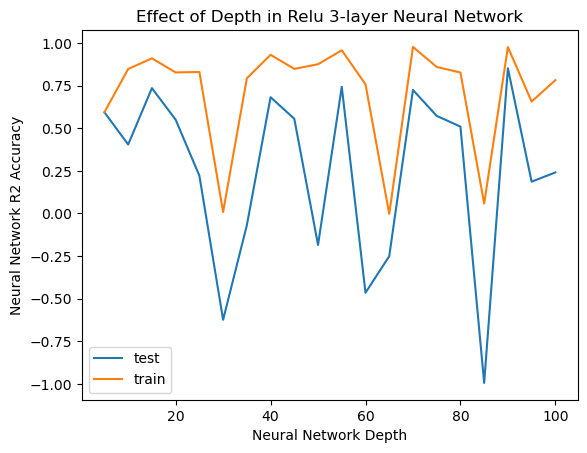

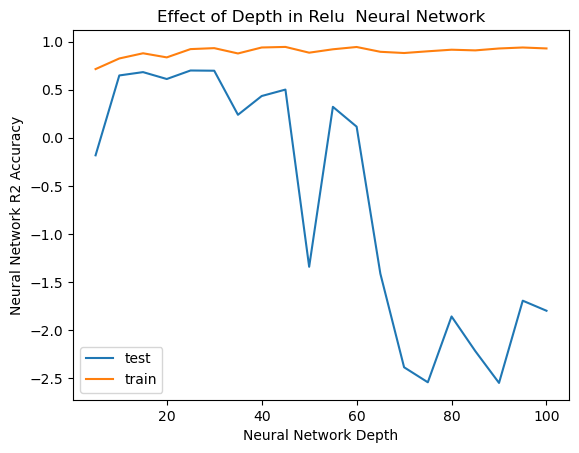

In [138]:
# Neural Network Regressor Depth (relu)
from sklearn.neural_network import MLPRegressor
Dnum = 20
NN_esti_train = np.zeros(Dnum)
NN_esti_test  = np.zeros(Dnum)

for i in range(Dnum):
    est = MLPRegressor(hidden_layer_sizes=(5+5*i,5), alpha=0.01,max_iter=2000,random_state=43,activation='relu').fit(x_train,y_train)
    NN_esti_train[i] = est.score(x_train,y_train)
    NN_esti_test[i]  = est.score(x_test,y_test)
    
NN_x = 5 +  5* np.arange(Dnum)
plt.plot(NN_x, NN_esti_test, label='test')
plt.plot(NN_x, NN_esti_train, label='train')
plt.xlabel("Neural Network Depth")
plt.ylabel("Neural Network R2 Accuracy")
plt.title("Effect of Depth in Relu 3-layer Neural Network")
plt.legend()
plt.savefig("Three_Layer_NN_Depth_ReLu.png")
plt.show()


# Neural Network Regressor Depth (relu)
from sklearn.neural_network import MLPRegressor
Dnum = 20
NN_esti_train = np.zeros(Dnum)
NN_esti_test  = np.zeros(Dnum)

for i in range(Dnum):
    est = MLPRegressor(hidden_layer_sizes=5+5*i, alpha=0.01,max_iter=2000,random_state=43,activation='relu').fit(x_train,y_train)
    NN_esti_train[i] = est.score(x_train,y_train)
    NN_esti_test[i]  = est.score(x_test,y_test)
    
NN_x = 5 +  5* np.arange(Dnum)
plt.plot(NN_x, NN_esti_test, label='test')
plt.plot(NN_x, NN_esti_train, label='train')
plt.xlabel("Neural Network Depth")
plt.ylabel("Neural Network R2 Accuracy")
plt.title("Effect of Depth in Relu  Neural Network")
plt.legend()
plt.savefig("NN_Depth_ReLu.png")
plt.show()

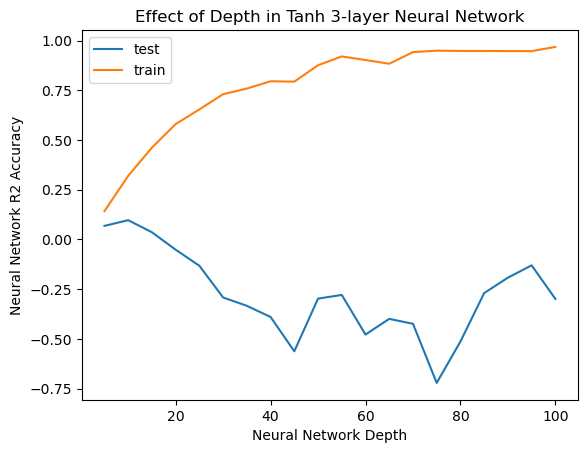

In [137]:
# Neural Network Regressor Depth (relu)
from sklearn.neural_network import MLPRegressor
Dnum = 20
NN_esti_train = np.zeros(Dnum)
NN_esti_test  = np.zeros(Dnum)

for i in range(Dnum):
    est = MLPRegressor(hidden_layer_sizes=5+5*i, alpha=0.01,max_iter=2000,random_state=43,activation='tanh').fit(x_train,y_train)
    NN_esti_train[i] = est.score(x_train,y_train)
    NN_esti_test[i]  = est.score(x_test,y_test)
    
NN_x = 5 +  5* np.arange(Dnum)
plt.plot(NN_x, NN_esti_test, label='test')
plt.plot(NN_x, NN_esti_train, label='train')
plt.xlabel("Neural Network Depth")
plt.ylabel("Neural Network R2 Accuracy")
plt.title("Effect of Depth in Tanh  Neural Network")
plt.legend()
plt.savefig("NN_Depth_Tanh.png")
plt.show()



# 3 layer
NN_esti_train = np.zeros(Dnum)
NN_esti_test  = np.zeros(Dnum)

for i in range(Dnum):
    est = MLPRegressor(hidden_layer_sizes=(5+5*i,2), alpha=0.01,max_iter=2000,random_state=43,activation='tanh').fit(x_train,y_train)
    NN_esti_train[i] = est.score(x_train,y_train)
    NN_esti_test[i]  = est.score(x_test,y_test)
    
NN_x = 5 +  5* np.arange(Dnum)
plt.plot(NN_x, NN_esti_test, label='test')
plt.plot(NN_x, NN_esti_train, label='train')
plt.xlabel("Neural Network Depth")
plt.ylabel("Neural Network R2 Accuracy")
plt.title("Effect of Depth in Tanh 3-layer Neural Network")
plt.legend()
plt.savefig("Three_Layer_NN_Depth_Tanh.png")
plt.show()